# Analysis of the pre-questionnaire and group assignment for the usability study

In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
from collections import defaultdict
import random
from matplotlib.ticker import MaxNLocator

# If there is no outputs folder, create one
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Read the excel file to the dataframe
df = pd.read_excel('pre_questionnaire.xlsx')

In [86]:
df

,ID,Start time,Completion time,Email,What is your age group?,What is your highest level of education?,What is your current job title?,How many years of experience do you have in software development?,Skills,Skills2,Skills3,Skills4,Skills5,Skills6,How many years of experience do you have in cyber security?,Knowledge level,Sent calender link?,Postprocessed: What is your current job title?
0,1,2024-04-02 09:11:40,2024-04-02 09:15:51,anonymous,25-34,Bachelor's degree,Freelancing IT Consultant,1-3 years,3,2,1,2,3,2,Less than 1 year,1,Yes,IT Consultant
1,2,2024-04-02 09:37:12,2024-04-02 09:42:08,anonymous,25-34,Bachelor's degree,Data and business analysis,1-3 years,3,1,1,4,4,4,Less than 1 year,1,Yes,Data Analyst
2,3,2024-04-02 10:34:21,2024-04-02 10:36:51,anonymous,18-24,Bachelor's degree,Working Student,1-3 years,4,3,4,4,4,3,Less than 1 year,3,Yes,Software Engineer
3,4,2024-04-02 10:42:37,2024-04-02 10:55:07,anonymous,25-34,Master's degree,Perception Development Engineer,1-3 years,2,1,2,4,1,1,Less than 1 year,2,Yes,Perception Development Engineer
4,5,2024-04-02 11:22:14,2024-04-02 11:24:47,anonymous,25-34,Master's degree,Software Engineer,4-6 years,4,3,1,5,2,4,Less than 1 year,2,Yes,Software Engineer
5,6,2024-04-02 11:38:52,2024-04-02 11:41:04,anonymous,25-34,Master's degree,Security Consultant,1-3 years,4,3,3,4,3,3,1-3 years,4,Yes,Security Consultant
6,7,2024-04-02 12:21:35,2024-04-02 12:23:50,anonymous,25-34,Bachelor's degree,システムエンジニア,4-6 years,2,2,1,1,3,2,Less than 1 year,3,Yes,System Engineer
7,8,2024-04-02 18:22:40,2024-04-02 18:25:10,anonymous,25-34,Master's degree,Software Engineer,Less than 1 year,1,1,1,2,3,1,Less than 1 year,2,Yes,Software Engineer
8,9,2024-04-02 19:33:18,2024-04-02 19:36:30,anonymous,18-24,Master's degree,Software Engineer,4-6 years,4,3,3,4,1,3,Less than 1 year,2,Yes,Software Engineer
9,10,2024-04-02 21:31:28,2024-04-02 21:33:51,anonymous,25-34,Master's degree,Software engineer,4-6 years,4,3,3,5,3,3,1-3 years,2,Yes,Software Engineer


In [87]:
# Print the type of the columns
print(df.dtypes)

ID                                                                            int64
Start time                                                           datetime64[ns]
Completion time                                                      datetime64[ns]
Email                                                                        object
What is your age group?                                                      object
What is your highest level of education?                                     object
What is your current job title?                                              object
How many years of experience do you have in software development?            object
Skills                                                                        int64
Skills2                                                                       int64
Skills3                                                                       int64
Skills4                                                                     

For the usability testing, we will take into consideration of the following aspects to assign participants to the groups:
1. **Software development experience**
2. **Cybersecurity knowledge**

Based on the pre-questionnaire in terms of the aspects above, we have assigned into the Group 1 (Exmperimental group) and Group 2 (Control group).


1-3 years           9
4-6 years           9
Less than 1 year    2
7-9 years           1
10 years or more    1
Name: How many years of experience do you have in software development?, dtype: int64


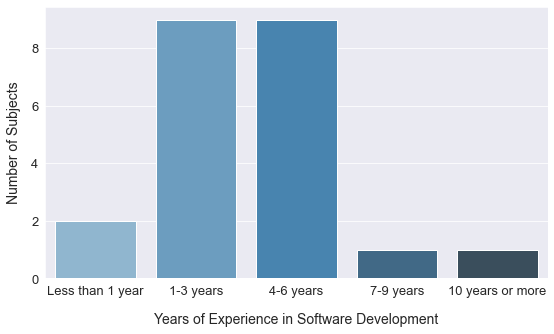

In [88]:
# Output the distribution of the values in "How many years of experience do you have in software development?" column.
print(df['How many years of experience do you have in software development?'].value_counts())

# Define fixed colors for each category using a color map
color_map = {
    "Less than 1 year": sns.color_palette("Blues")[1],
    "1-3 years": sns.color_palette("Blues")[2],
    "4-6 years": sns.color_palette("Blues")[3],
    "7-9 years": sns.color_palette("Blues")[4],
    "10 years or more": sns.color_palette("Blues")[5]
}

# Create a palette based on the order of appearance in the data column
# Create an order list from color_map's keys
order = list(color_map.keys())
palette = [color_map[exp] for exp in order]

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(
    x='How many years of experience do you have in software development?', 
    data=df,
    palette='Blues_d',  # Use palette with specific colors mapped to categories
    order=order       # Optional: ensure the bars follow the order of appearance
)
ax.set_xlabel('Years of Experience in Software Development', fontsize=14, labelpad=15)
ax.set_ylabel('Number of Subjects', fontsize=14, labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.savefig('./outputs/years_of_experience.pdf', bbox_inches='tight')
plt.show()

1-3 years           9
4-6 years           9
Less than 1 year    2
7-9 years           1
10 years or more    1
Name: How many years of experience do you have in software development?, dtype: int64


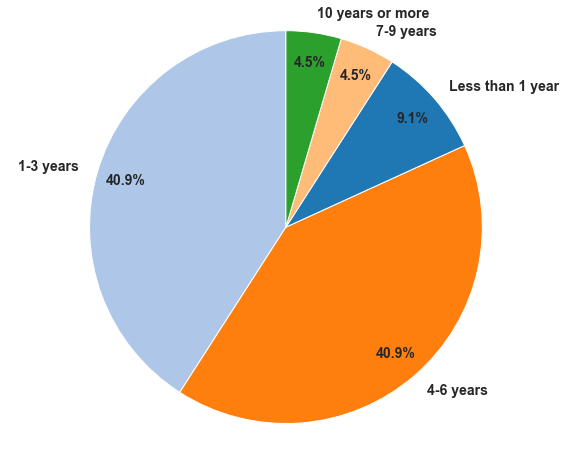

In [89]:

# Define fixed colors for each category
color_map = {
    "Less than 1 year": sns.color_palette("tab20")[0],
    "1-3 years": sns.color_palette("tab20")[1],
    "4-6 years": sns.color_palette("tab20")[2],
    "7-9 years": sns.color_palette("tab20")[3],
    "10 years or more": sns.color_palette("tab20")[4]
}

# Output the distribution of the values in "How many years of experience do you have in software development?" column.
print(df['How many years of experience do you have in software development?'].value_counts())

# Get the value counts for software development experience
dev_experience_counts = df['How many years of experience do you have in software development?'].value_counts()

# Assign colors to each experience level based on the predefined color map
colors = [color_map.get(x, 'gray') for x in dev_experience_counts.index]

# Plotting the pie chart for software development experience
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
ax.pie(dev_experience_counts, labels=dev_experience_counts.index, autopct=lambda p: f'{p:.1f}%', startangle=90, colors=colors, pctdistance=0.85, textprops={'fontsize': 14, 'weight':'bold'})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the position of the "7-9 years" percentage label
for text in ax.texts:
    if text.get_text() == '0.1%':
        text.set_position((text.get_position()[0] + 0.1, text.get_position()[1] - 0.05))

# Output the plot to the pdf file
plt.savefig('./outputs/dev_experience_pie_chart.pdf', bbox_inches='tight')

Less than 1 year    18
1-3 years            2
4-6 years            1
10 years or more     1
Name: How many years of experience do you have in cyber security?, dtype: int64


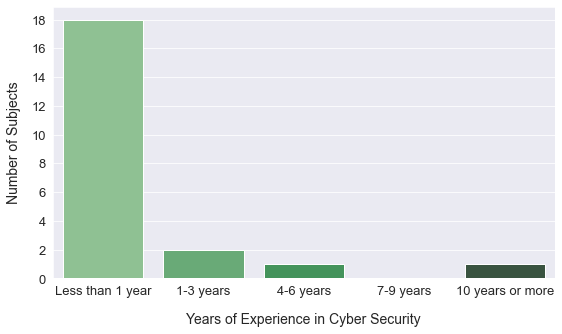

In [90]:
# Output the distribution of the values in "How many years of experience do you have in cyber security?" column.
print(df['How many years of experience do you have in cyber security?'].value_counts())

# Define fixed colors for each category using a color map
color_map = {
    "Less than 1 year": sns.color_palette("crest")[0],
    "1-3 years": sns.color_palette("crest")[1],
    "4-6 years": sns.color_palette("crest")[2],
    "7-9 years": sns.color_palette("crest")[3],
    "10 years or more": sns.color_palette("crest")[4]
}

# Create a palette based on the order of appearance in the data column
# Create an order list from color_map's keys
order = list(color_map.keys())
palette = [color_map[exp] for exp in order]

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(
    x='How many years of experience do you have in cyber security?', 
    data=df,
    palette="Greens_d",  # Use palette with specific colors mapped to categories
    order=order       # Optional: ensure the bars follow the order of appearance
)
ax.set_xlabel('Years of Experience in Cyber Security', fontsize=14, labelpad=15)
ax.set_ylabel('Number of Subjects', fontsize=14, labelpad=10)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# output the plot to the pdf file
plt.savefig('./outputs/years_of_experience_cyber.pdf', bbox_inches='tight')
plt.show()

Now, let's split the participants into two groups based on the above aspects in terms of the Software development experience and Cybersecurity knowledge. <br>

Below is the desired distribution of the participants in the two groups:

In [91]:
distribution = {
    "Less than 1 year": {"g1": 1 , "g2": 1},
    "1-3 years": {"g1": 4, "g2": 5},
    "4-6 years": {"g1": 5, "g2": 4},
    "7-9 years": {"g1": 1, "g2": 0},
    "10 years or more": {"g1": 0, "g2": 1},
}

# Create a DataFrame from the distribution dictionary
data = {
    "Group 1": [distribution[experience]["g1"] for experience in distribution],
    "Group 2": [distribution[experience]["g2"] for experience in distribution]
}
experience_levels = list(distribution.keys())
df_dist_group_sd = pd.DataFrame(data, index=experience_levels)

df_dist_group_sd

,Group 1,Group 2
Less than 1 year,1,1
1-3 years,4,5
4-6 years,5,4
7-9 years,1,0
10 years or more,0,1


In [92]:
distribution_cs = {
    "Less than 1 year": {"g1": 9 , "g2": 9},
    "1-3 years": {"g1": 1, "g2": 1},
    "4-6 years": {"g1": 1, "g2": 0},
    "10 years or more": {"g1": 0, "g2": 1},
}

distribution_cs_reverse = {
    "Less than 1 year": {"g1": 9 , "g2": 9},
    "1-3 years": {"g1": 1, "g2": 1},
    "4-6 years": {"g1": 0, "g2": 1},
    "10 years or more": {"g1": 1, "g2": 0},
}

data_cs = {
    "Group 1": [distribution_cs[experience]["g1"] for experience in distribution_cs],
    "Group 2": [distribution_cs[experience]["g2"] for experience in distribution_cs]
}
experience_levels_cs = list(distribution_cs.keys())
df_dist_group_cs = pd.DataFrame(data_cs, index=experience_levels_cs)

df_dist_group_cs


,Group 1,Group 2
Less than 1 year,9,9
1-3 years,1,1
4-6 years,1,0
10 years or more,0,1


In [ ]:
# Divide the data into two groups based on the value of "How many years of experience do you have in software development?" column.
# Each group should have the same distribution of the values in "How many years of experience do you have in cyber security?" column.
# Set two lists, one for each group. And assign the index of the rows to the lists.

# Randon seed to make the results reproducible
seed = 49

# Categorize entries by experience level
categorized_entries = defaultdict(list)
for index, level in enumerate(df['How many years of experience do you have in software development?'].values):
    categorized_entries[level].append(index)

# Initialize lists for the two groups' indexes
group_1_indexes = []
group_2_indexes = []

# Evenly distribute indexes from each category to the groups
for level, indexes in categorized_entries.items():
    # Some levels only have one entry, so we need to handle them separately
    if level=="Less than 1 year":
        random.Random(seed).shuffle(indexes)  # Shuffle to randomize distribution
        split_point = len(indexes) // 2
        group_1_indexes.extend(indexes[:split_point])
        group_2_indexes.extend(indexes[split_point:])
        print("Under Less than 1 year")
        print("indexes[:split_point]:", indexes[:split_point])
        print("indexes[split_point:]:", indexes[split_point:])
    if level=="7-9 years":
        group_1_indexes.extend(indexes)
    if level=="10 years or more":
        group_2_indexes.extend(indexes)
    if level=="1-3 years":
        random.Random(seed).shuffle(indexes)  # Shuffle to randomize distribution
        split_point = len(indexes) // 2
        # print("indexes[:split_point]:", indexes[:split_point])
        # print("indexes[split_point:]:", indexes[split_point:])
        group_1_indexes.extend(indexes[:split_point])
        group_2_indexes.extend(indexes[split_point:])
        print("Under 1-3 years")
        print("indexes[:split_point]:", indexes[:split_point])
        print("indexes[split_point:]:", indexes[split_point:])
        
    if level=="4-6 years": # This has odd number of entries, thus, we should have +1 for group2
        random.Random(seed).shuffle(indexes)
        split_point = len(indexes) // 2
        group_1_indexes.extend(indexes[:split_point+1])
        group_2_indexes.extend(indexes[split_point+1:])
        print("Under 4-6 years")
        print("indexes[:split_point]:", indexes[:split_point+1])
        print("indexes[split_point:]:", indexes[split_point+1:])
        
print("group_1_indexes:", group_1_indexes)
print("group_2_indexes:", group_2_indexes)

if len(group_1_indexes) != len(group_2_indexes):
    print("Error: The two groups do not have the same number of entries.")
# Check whether there is any duplicate index
if len(set(group_1_indexes) & set(group_2_indexes)) > 0:
    print("Error: The two groups have duplicate entries.")



Under 1-3 years
indexes[:split_point]: [17, 13, 5, 16]
indexes[split_point:]: [2, 0, 3, 10, 1]
Under 4-6 years
indexes[:split_point]: [21, 15, 12, 19, 8]
indexes[split_point:]: [4, 9, 14, 6]
Under Less than 1 year
indexes[:split_point]: [18]
indexes[split_point:]: [7]
group_1_indexes: [17, 13, 5, 16, 21, 15, 12, 19, 8, 18, 11]
group_2_indexes: [2, 0, 3, 10, 1, 4, 9, 14, 6, 7, 20]


Group 1:
4-6 years           5
1-3 years           4
Less than 1 year    1
7-9 years           1
Name: How many years of experience do you have in software development?, dtype: int64
Group 2:
1-3 years           5
4-6 years           4
Less than 1 year    1
10 years or more    1
Name: How many years of experience do you have in software development?, dtype: int64



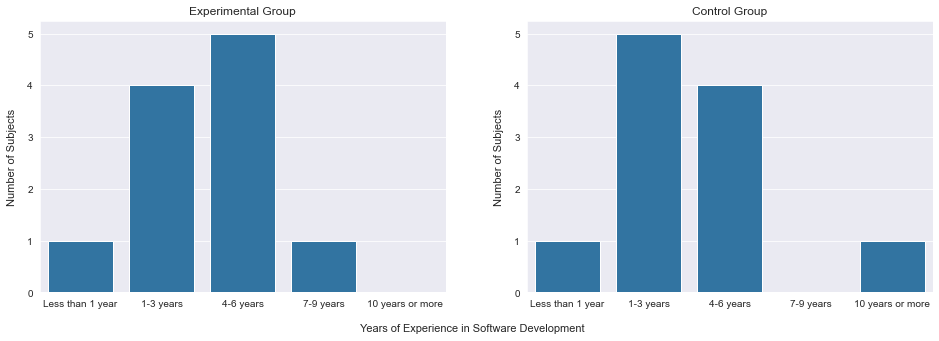

In [94]:
# Define the order of categories and a consistent color palette for both plots
order = ["Less than 1 year", "1-3 years", "4-6 years", "7-9 years", "10 years or more"]
palette = sns.color_palette("husl", len(order))

# Create the distribution of the values in the list of indexes in each group
group_1 = df.loc[group_1_indexes]
group_2 = df.loc[group_2_indexes]

# Output the distribution of the values in "How many years of experience do you have in cyber security?" column for each group.
print("Group 1:")
print(group_1['How many years of experience do you have in software development?'].value_counts())
print("Group 2:")
print(group_2['How many years of experience do you have in software development?'].value_counts())
print()

# And, visualize the distribution of the values in "How many years of experience do you have in software development?" column for each group.
# Plot for Group 1
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(
    x='How many years of experience do you have in software development?',
    data=group_1,
    ax=axs[0],
    order=order,
    color=sns.color_palette("tab10")[0]
)
axs[0].set_title("Experimental Group")
# axs[0].set_xlabel('Years of Experience in Software Development', fontsize=11, labelpad=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of Subjects', fontsize= 11, labelpad=10)

# Plot for Group 2
sns.countplot(
    x='How many years of experience do you have in software development?',
    data=group_2,
    ax=axs[1],
    order=order,
    color=sns.color_palette("tab10")[0]
)
axs[1].set_title("Control Group")
# axs[1].set_xlabel('Years of Experience in Software Development', fontsize=11, labelpad=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Number of Subjects', fontsize= 11, labelpad=10)

# fig.suptitle('Distribution of Years of Experience in Software Development for Each Group', fontsize=13)
fig.supxlabel('Years of Experience in Software Development', fontsize=11)

# Save it as pdf file
plt.savefig('./outputs/years_of_experience_group.pdf', bbox_inches='tight')

plt.show()


In [95]:
sns.color_palette("Greens")[3]

(0.3388235294117647, 0.7117262591311034, 0.40584390618992694)

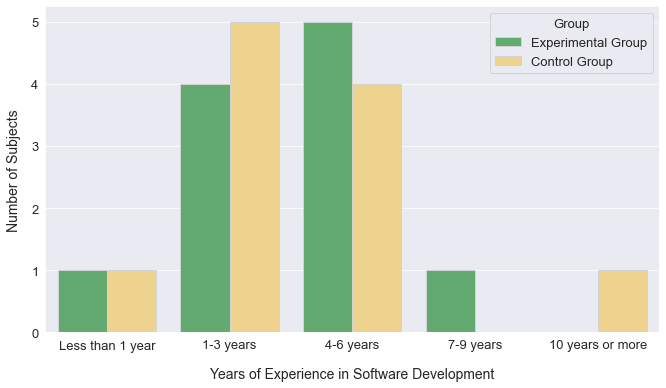

In [96]:
# Assuming df, group_1_indexes, and group_2_indexes are defined as per your setup
group_1 = df.loc[group_1_indexes].copy()
group_2 = df.loc[group_2_indexes].copy()

# Add a new column 'Group' to distinguish between groups
group_1['Group'] = 'Experimental Group'
group_2['Group'] = 'Control Group'

# Combine the dataframes
combined_df = pd.concat([group_1, group_2])

# Define the order of categories
order = ["Less than 1 year", "1-3 years", "4-6 years", "7-9 years", "10 years or more"]
# Custom colors from specified palettes
custom_palette = [sns.color_palette("Greens")[3], sns.color_palette("YlOrBr")[1]]

# Plot
plt.figure(figsize=(11, 6))
sns.countplot(
    x='How many years of experience do you have in software development?',
    hue='Group',
    data=combined_df,
    order=order,
    palette=custom_palette,  # You can choose a palette that suits your needs
    edgecolor='lightgray',  # Add black edges around the bars
)

plt.xlabel('Years of Experience in Software Development', fontsize=14, labelpad=15)
plt.ylabel('Number of Subjects', fontsize=14, labelpad=10)
# Position the legend
plt.legend(title='Group', loc='upper right', title_fontsize='13', fontsize='13')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Save the plot
plt.savefig('./outputs/combined_years_of_experience_group.pdf', bbox_inches='tight')

plt.show()

Group 1:
Less than 1 year    9
1-3 years           1
10 years or more    1
Name: How many years of experience do you have in cyber security?, dtype: int64
Group 2:
Less than 1 year    9
4-6 years           1
1-3 years           1
Name: How many years of experience do you have in cyber security?, dtype: int64



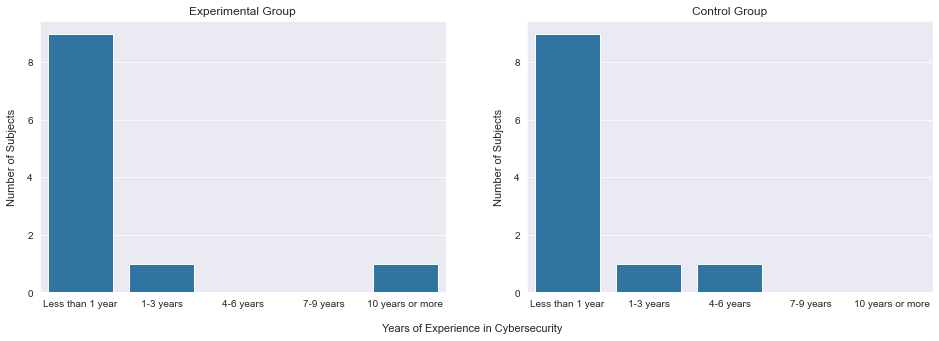

In [97]:
# Output the distribution of the values in "How many years of experience do you have in cyber security?" column for each group.
print("Group 1:")
print(group_1['How many years of experience do you have in cyber security?'].value_counts())
print("Group 2:")
print(group_2['How many years of experience do you have in cyber security?'].value_counts())    
print()


# And, visualize the distribution of the values in "How many years of experience do you have in software development?" column for each group.
# Plot for Group 1
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(
    x='How many years of experience do you have in cyber security?',
    data=group_1,
    ax=axs[0],
    order=order,
    color=sns.color_palette("tab10")[0]
)
axs[0].set_title("Experimental Group")
# axs[0].set_xlabel('Years of Experience in Software Development', fontsize=11, labelpad=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of Subjects', fontsize= 11, labelpad=10)

# Plot for Group 2
sns.countplot(
    x='How many years of experience do you have in cyber security?',
    data=group_2,
    ax=axs[1],
    order=order,
    color=sns.color_palette("tab10")[0]
)
axs[1].set_title("Control Group")
# axs[1].set_xlabel('Years of Experience in Software Development', fontsize=11, labelpad=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Number of Subjects', fontsize= 11, labelpad=10)

# fig.suptitle('Distribution of Years of Experience in Software Development for Each Group', fontsize=13)
fig.supxlabel('Years of Experience in Cybersecurity', fontsize=11)

# Save it as pdf file
plt.savefig('./outputs/years_of_experience_group_cyber.pdf', bbox_inches='tight')

plt.show()

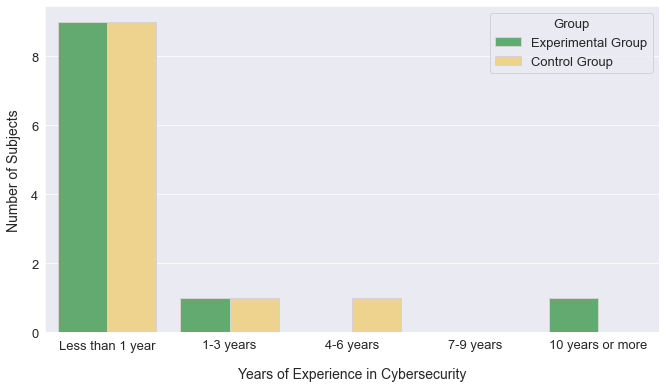

In [98]:
# Assuming df, group_1_indexes, and group_2_indexes are defined as per your setup
group_1 = df.loc[group_1_indexes].copy()
group_2 = df.loc[group_2_indexes].copy()

# Add a new column 'Group' to distinguish between groups
group_1['Group'] = 'Experimental Group'
group_2['Group'] = 'Control Group'

# Combine the dataframes
combined_df = pd.concat([group_1, group_2])

# Define the order of categories
order = ["Less than 1 year", "1-3 years", "4-6 years", "7-9 years", "10 years or more"]
# Custom colors from specified palettes
custom_palette = [sns.color_palette("Greens")[3], sns.color_palette("YlOrBr")[1]]

# Plot
plt.figure(figsize=(11, 6))
sns.countplot(
    x='How many years of experience do you have in cyber security?',
    hue='Group',
    data=combined_df,
    order=order,
    palette=custom_palette,  # You can choose a palette that suits your needs
    edgecolor='lightgray',  # Add black edges around the bars
)

plt.xlabel('Years of Experience in Cybersecurity', fontsize=14, labelpad=15)
plt.ylabel('Number of Subjects', fontsize=14, labelpad=10)
# Position the legend
plt.legend(title='Group', loc='upper right', title_fontsize='13', fontsize='13')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Save the plot
plt.savefig('./outputs/combined_years_of_experience_group_cyber.pdf', bbox_inches='tight')

plt.show()

In [99]:
group_1

,ID,Start time,Completion time,Email,What is your age group?,What is your highest level of education?,What is your current job title?,How many years of experience do you have in software development?,Skills,Skills2,Skills3,Skills4,Skills5,Skills6,How many years of experience do you have in cyber security?,Knowledge level,Sent calender link?,Postprocessed: What is your current job title?,Group
17,18,2024-04-08 12:19:08,2024-04-08 12:45:33,anonymous,18-24,High school graduate,"Working Student, Platforms - Artificial Intell...",1-3 years,3,2,3,3,3,2,Less than 1 year,2,Yes,Software Engineer,Experimental Group
13,14,2024-04-05 01:06:02,2024-04-05 01:11:37,anonymous,25-34,Bachelor's degree,Software Engineer,1-3 years,3,1,1,2,4,4,Less than 1 year,2,Yes,Software Engineer,Experimental Group
5,6,2024-04-02 11:38:52,2024-04-02 11:41:04,anonymous,25-34,Master's degree,Security Consultant,1-3 years,4,3,3,4,3,3,1-3 years,4,Yes,Security Consultant,Experimental Group
16,17,2024-04-08 11:29:07,2024-04-08 11:30:45,anonymous,18-24,Bachelor's degree,Software Developer,1-3 years,3,3,2,4,5,4,Less than 1 year,3,Yes,Software Engineer,Experimental Group
21,23,2024-04-09 08:08:04,2024-04-09 08:10:04,anonymous,25-34,Master's degree,software engineer,4-6 years,3,3,1,1,3,2,Less than 1 year,1,Yes,Software Engineer,Experimental Group
15,16,2024-04-08 09:46:53,2024-04-08 09:48:39,anonymous,25-34,Master's degree,Doctoral candidate,4-6 years,3,2,2,4,2,1,Less than 1 year,2,Yes,Research Associate,Experimental Group
12,13,2024-04-04 15:48:30,2024-04-04 15:49:46,anonymous,25-34,Master's degree,Software engineer,4-6 years,3,2,3,2,4,4,Less than 1 year,3,Yes,Software Engineer,Experimental Group
19,21,2024-04-08 18:31:22,2024-04-08 18:32:41,anonymous,25-34,Master's degree,Research Associate,4-6 years,3,2,2,4,2,3,Less than 1 year,3,Yes,Research Associate,Experimental Group
8,9,2024-04-02 19:33:18,2024-04-02 19:36:30,anonymous,18-24,Master's degree,Software Engineer,4-6 years,4,3,3,4,1,3,Less than 1 year,2,Yes,Software Engineer,Experimental Group
18,20,2024-04-08 16:47:38,2024-04-08 16:49:48,anonymous,35-44,Doctorate or higher,Senior Key Expert,Less than 1 year,2,1,2,2,3,1,10 years or more,4,NaN,Senior Key Expert,Experimental Group


In [100]:
group_2

,ID,Start time,Completion time,Email,What is your age group?,What is your highest level of education?,What is your current job title?,How many years of experience do you have in software development?,Skills,Skills2,Skills3,Skills4,Skills5,Skills6,How many years of experience do you have in cyber security?,Knowledge level,Sent calender link?,Postprocessed: What is your current job title?,Group
2,3,2024-04-02 10:34:21,2024-04-02 10:36:51,anonymous,18-24,Bachelor's degree,Working Student,1-3 years,4,3,4,4,4,3,Less than 1 year,3,Yes,Software Engineer,Control Group
0,1,2024-04-02 09:11:40,2024-04-02 09:15:51,anonymous,25-34,Bachelor's degree,Freelancing IT Consultant,1-3 years,3,2,1,2,3,2,Less than 1 year,1,Yes,IT Consultant,Control Group
3,4,2024-04-02 10:42:37,2024-04-02 10:55:07,anonymous,25-34,Master's degree,Perception Development Engineer,1-3 years,2,1,2,4,1,1,Less than 1 year,2,Yes,Perception Development Engineer,Control Group
10,11,2024-04-03 09:59:26,2024-04-03 10:01:02,anonymous,25-34,Master's degree,Cyber Security Consultant,1-3 years,3,4,3,4,2,1,4-6 years,4,Yes,Cyber Security Consultant,Control Group
1,2,2024-04-02 09:37:12,2024-04-02 09:42:08,anonymous,25-34,Bachelor's degree,Data and business analysis,1-3 years,3,1,1,4,4,4,Less than 1 year,1,Yes,Data Analyst,Control Group
4,5,2024-04-02 11:22:14,2024-04-02 11:24:47,anonymous,25-34,Master's degree,Software Engineer,4-6 years,4,3,1,5,2,4,Less than 1 year,2,Yes,Software Engineer,Control Group
9,10,2024-04-02 21:31:28,2024-04-02 21:33:51,anonymous,25-34,Master's degree,Software engineer,4-6 years,4,3,3,5,3,3,1-3 years,2,Yes,Software Engineer,Control Group
14,15,2024-04-07 16:56:31,2024-04-07 17:03:42,anonymous,25-34,Master's degree,Research Associate in Geoinformatics,4-6 years,4,1,1,4,4,3,Less than 1 year,1,Yes,Research Associate,Control Group
6,7,2024-04-02 12:21:35,2024-04-02 12:23:50,anonymous,25-34,Bachelor's degree,システムエンジニア,4-6 years,2,2,1,1,3,2,Less than 1 year,3,Yes,System Engineer,Control Group
7,8,2024-04-02 18:22:40,2024-04-02 18:25:10,anonymous,25-34,Master's degree,Software Engineer,Less than 1 year,1,1,1,2,3,1,Less than 1 year,2,Yes,Software Engineer,Control Group


In [101]:
# Save the two groups to separate excel files
group_1.to_excel('group_1.xlsx', index=False)
group_2.to_excel('group_2.xlsx', index=False)

# Charts for Appendix

In [102]:
# Read the excel file to the dataframe
df = pd.read_excel('pre_questionnaire.xlsx')

df.head()

,ID,Start time,Completion time,Email,What is your age group?,What is your highest level of education?,What is your current job title?,How many years of experience do you have in software development?,Skills,Skills2,Skills3,Skills4,Skills5,Skills6,How many years of experience do you have in cyber security?,Knowledge level,Sent calender link?,Postprocessed: What is your current job title?
0,1,2024-04-02 09:11:40,2024-04-02 09:15:51,anonymous,25-34,Bachelor's degree,Freelancing IT Consultant,1-3 years,3,2,1,2,3,2,Less than 1 year,1,Yes,IT Consultant
1,2,2024-04-02 09:37:12,2024-04-02 09:42:08,anonymous,25-34,Bachelor's degree,Data and business analysis,1-3 years,3,1,1,4,4,4,Less than 1 year,1,Yes,Data Analyst
2,3,2024-04-02 10:34:21,2024-04-02 10:36:51,anonymous,18-24,Bachelor's degree,Working Student,1-3 years,4,3,4,4,4,3,Less than 1 year,3,Yes,Software Engineer
3,4,2024-04-02 10:42:37,2024-04-02 10:55:07,anonymous,25-34,Master's degree,Perception Development Engineer,1-3 years,2,1,2,4,1,1,Less than 1 year,2,Yes,Perception Development Engineer
4,5,2024-04-02 11:22:14,2024-04-02 11:24:47,anonymous,25-34,Master's degree,Software Engineer,4-6 years,4,3,1,5,2,4,Less than 1 year,2,Yes,Software Engineer


25-34    16
18-24     4
35-44     2
Name: What is your age group?, dtype: int64


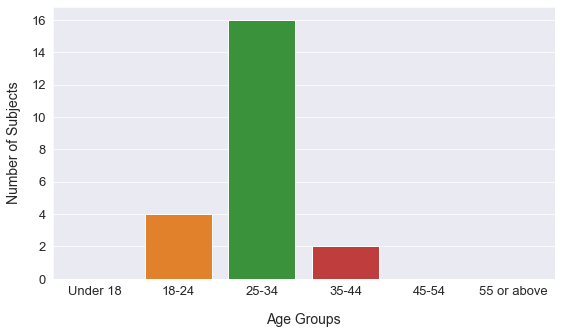

In [103]:
print(df['What is your age group?'].value_counts())

# Define the list of categories and the color palette
group_lists = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55 or above"]    

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(9, 5))
sns.countplot(
    x='What is your age group?', 
    data=df,
    #palette="Greens_d",  # Use palette with specific colors mapped to categories
    order=group_lists       # Optional: ensure the bars follow the order of appearance
)
ax.set_xlabel('Age Groups', fontsize=14, labelpad=15)
ax.set_ylabel('Number of Subjects', fontsize=14, labelpad=10)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# output the plot to the pdf file
plt.savefig('./outputs/age_groups.pdf', bbox_inches='tight')
plt.show()

Master's degree          14
Bachelor's degree         6
High school graduate      1
Doctorate or higher       1
Name: What is your highest level of education?, dtype: int64


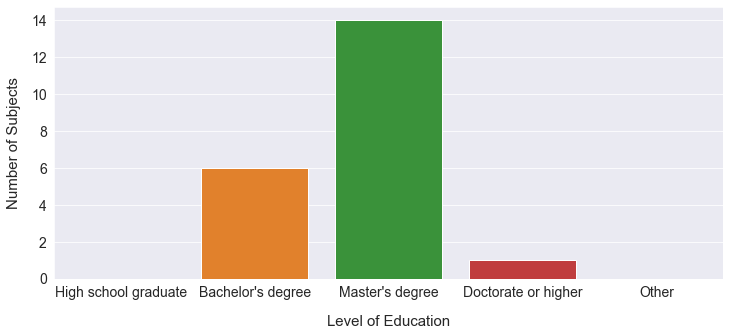

In [104]:
print(df['What is your highest level of education?'].value_counts())

# Define the list of categories and the color palette
group_lists = ["High school graduate", "Bachelor's degree", "Master's degree", "Doctorate or higher", "Other"]

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(
    x='What is your highest level of education?', 
    data=df,
    #palette="Greens_d",  # Use palette with specific colors mapped to categories
    order=group_lists       # Optional: ensure the bars follow the order of appearance
)
ax.set_xlabel('Level of Education', fontsize=15, labelpad=15)
ax.set_ylabel('Number of Subjects', fontsize=15, labelpad=10)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# output the plot to the pdf file
plt.savefig('./outputs/level_of_education.pdf', bbox_inches='tight')
plt.show()

Software Engineer                  10
Research Associate                  3
IT Consultant                       2
Data Analyst                        1
Perception Development Engineer     1
Security Consultant                 1
System Engineer                     1
Cyber Security Consultant           1
Senior Key Expert                   1
Manager Technology                  1
Name: Postprocessed: What is your current job title?, dtype: int64


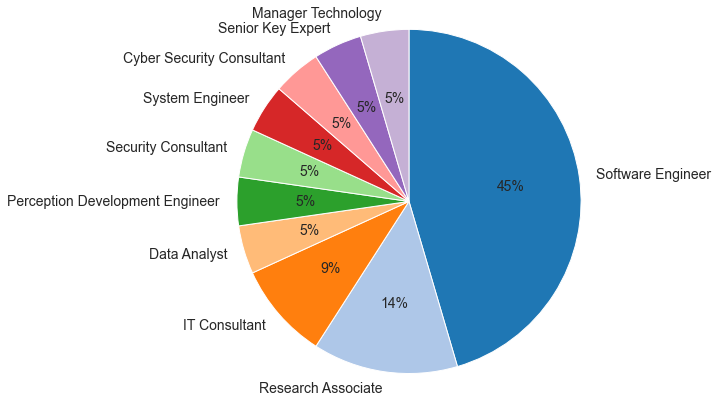

In [105]:


# Output the distribution of the values in "How many years of experience do you have in software development?" column.
print(df['Postprocessed: What is your current job title?'].value_counts())

# output pie chart using sns
plt.figure(figsize=(9, 7))
df['Postprocessed: What is your current job title?'].value_counts().plot.pie(autopct='%1.0f%%', 
                                                                             startangle=90, 
                                                                             colors=sns.color_palette("tab20"), 
                                                                             counterclock=False,
                                                                             textprops={'fontsize': 14})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('')  # Remove the default ylabel
# plt.title('Job Titles', fontsize=15, pad=30)  # Add a title with padding

# Save the plot
plt.savefig('./outputs/job_titles_pie_chart.pdf', bbox_inches='tight')

plt.show()


## Q5: On a scale from 1 to 5, how would you rate your software development skills? (1: Beginner, 5: Expert)

In [106]:
# value counts for the "Skills" column
print(df['Skills'].value_counts())

# Now, replace the values in the "Skills" column (1, 2, 3, 4, 5) with the corresponding scale (Beginner, Basic, Intermediate, Advanced, Expert)
scale_lists= ["Beginner", "Basic", "Intermediate", "Advanced", "Expert"]

# Replace the values in the "Skills" column
df['Skills'] = df['Skills'].replace({
    1: "Beginner",
    2: "Basic",
    3: "Intermediate",
    4: "Advanced",
    5: "Expert"
})
print("-------------------")

# Output the distribution of the values in "Skills" column after the replacement based on the order of the scale_lists
# Assuming df is your DataFrame and the 'Skills' column has already been modified
value_counts = df['Skills'].value_counts()

# Reorder the value counts based on the scale_lists order
ordered_value_counts = value_counts.reindex(scale_lists)

# Print the reordered counts
print(ordered_value_counts)

3    10
4     6
2     3
5     2
1     1
Name: Skills, dtype: int64
-------------------
Beginner         1
Basic            3
Intermediate    10
Advanced         6
Expert           2
Name: Skills, dtype: int64


/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_88794/1994990314.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


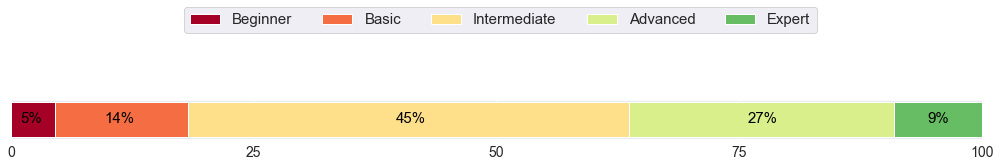

In [107]:
# Data
percentages = [(1/22)*100, (3/22)*100, (10/22)*100, (6/22)*100, (2/22)*100]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, scale_lists, loc='center', ncol=len(scale_lists), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/software_development_skill.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

## Q6: On a scale from 1 to 5, please rate your knowledge of the programming language C. (1: Beginner, 5: Expert)

In [108]:
# value counts for the "Skills" column
print(df['Skills2'].value_counts())

# Now, replace the values in the "Skills" column (1, 2, 3, 4, 5) with the corresponding scale (Beginner, Basic, Intermediate, Advanced, Expert)
scale_lists= ["Beginner", "Basic", "Intermediate", "Advanced", "Expert"]

# Replace the values in the "Skills" column
df['Skills2'] = df['Skills2'].replace({
    1: "Beginner",
    2: "Basic",
    3: "Intermediate",
    4: "Advanced",
    5: "Expert"
})
print("-------------------")

# Output the distribution of the values in "Skills" column after the replacement based on the order of the scale_lists
# Assuming df is your DataFrame and the 'Skills' column has already been modified
value_counts = df['Skills2'].value_counts()

# Reorder the value counts based on the scale_lists order
ordered_value_counts = value_counts.reindex(scale_lists)

# Print the reordered counts
print(ordered_value_counts)

2    8
3    7
1    6
4    1
Name: Skills2, dtype: int64
-------------------
Beginner        6.0
Basic           8.0
Intermediate    7.0
Advanced        1.0
Expert          NaN
Name: Skills2, dtype: float64


/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_88794/2478308272.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


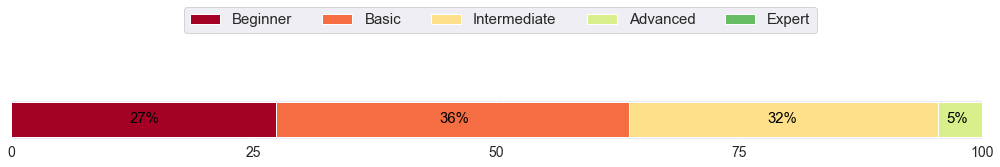

In [109]:
# Data
percentages = [(6/22)*100, (8/22)*100, (7/22)*100, (1/22)*100, 0]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, scale_lists, loc='center', ncol=len(scale_lists), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/c_skill.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

## Q7: On a scale from 1 to 5, please rate your knowledge of the programming language C++. (1: Beginner, 5: Expert)

In [110]:
# value counts for the "Skills" column
print(df['Skills3'].value_counts())

# Now, replace the values in the "Skills" column (1, 2, 3, 4, 5) with the corresponding scale (Beginner, Basic, Intermediate, Advanced, Expert)
scale_lists= ["Beginner", "Basic", "Intermediate", "Advanced", "Expert"]

# Replace the values in the "Skills" column
df['Skills3'] = df['Skills3'].replace({
    1: "Beginner",
    2: "Basic",
    3: "Intermediate",
    4: "Advanced",
    5: "Expert"
})
print("-------------------")

# Output the distribution of the values in "Skills" column after the replacement based on the order of the scale_lists
# Assuming df is your DataFrame and the 'Skills' column has already been modified
value_counts = df['Skills3'].value_counts()

# Reorder the value counts based on the scale_lists order
ordered_value_counts = value_counts.reindex(scale_lists)

# Print the reordered counts
print(ordered_value_counts)

1    9
2    6
3    6
4    1
Name: Skills3, dtype: int64
-------------------
Beginner        9.0
Basic           6.0
Intermediate    6.0
Advanced        1.0
Expert          NaN
Name: Skills3, dtype: float64


/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_88794/298072894.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


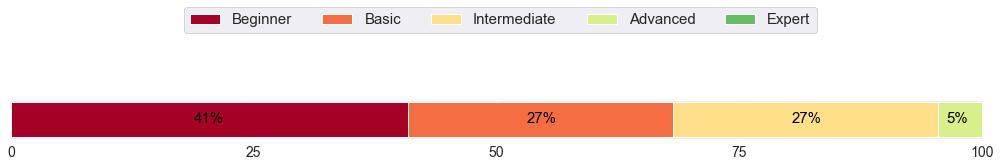

In [111]:
# Data
percentages = [(9/22)*100, (6/22)*100, (6/22)*100, (1/22)*100, 0]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, scale_lists, loc='center', ncol=len(scale_lists), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/cpp_skill.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

## Q8: On a scale from 1 to 5, please rate your knowledge of the programming language Python. (1: Beginner, 5: Expert)

In [112]:
# value counts for the "Skills" column
print(df['Skills4'].value_counts())

# Now, replace the values in the "Skills" column (1, 2, 3, 4, 5) with the corresponding scale (Beginner, Basic, Intermediate, Advanced, Expert)
scale_lists= ["Beginner", "Basic", "Intermediate", "Advanced", "Expert"]

# Replace the values in the "Skills" column
df['Skills4'] = df['Skills4'].replace({
    1: "Beginner",
    2: "Basic",
    3: "Intermediate",
    4: "Advanced",
    5: "Expert"
})
print("-------------------")

# Output the distribution of the values in "Skills" column after the replacement based on the order of the scale_lists
# Assuming df is your DataFrame and the 'Skills' column has already been modified
value_counts = df['Skills4'].value_counts()

# Reorder the value counts based on the scale_lists order
ordered_value_counts = value_counts.reindex(scale_lists)

# Print the reordered counts
print(ordered_value_counts)

4    10
2     5
3     3
5     2
1     2
Name: Skills4, dtype: int64
-------------------
Beginner         2
Basic            5
Intermediate     3
Advanced        10
Expert           2
Name: Skills4, dtype: int64


/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_88794/2380706700.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


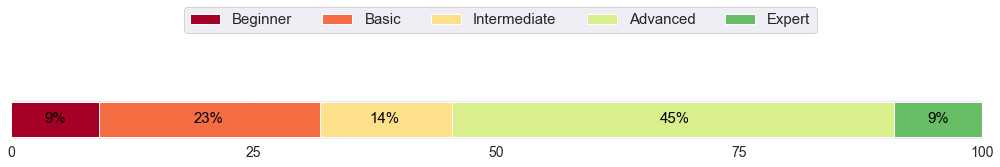

In [113]:
# Data
percentages = [(2/22)*100, (5/22)*100, (3/22)*100, (10/22)*100, (2/22)*100]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, scale_lists, loc='center', ncol=len(scale_lists), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/python_skill.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

## Q9: On a scale from 1 to 5, please rate your knowledge of the programming language Java. (1: Beginner, 5: Expert)

In [114]:
# value counts for the "Skills" column
print(df['Skills5'].value_counts())

# Now, replace the values in the "Skills" column (1, 2, 3, 4, 5) with the corresponding scale (Beginner, Basic, Intermediate, Advanced, Expert)
scale_lists= ["Beginner", "Basic", "Intermediate", "Advanced", "Expert"]

# Replace the values in the "Skills" column
df['Skills5'] = df['Skills5'].replace({
    1: "Beginner",
    2: "Basic",
    3: "Intermediate",
    4: "Advanced",
    5: "Expert"
})
print("-------------------")

# Output the distribution of the values in "Skills" column after the replacement based on the order of the scale_lists
# Assuming df is your DataFrame and the 'Skills' column has already been modified
value_counts = df['Skills5'].value_counts()

# Reorder the value counts based on the scale_lists order
ordered_value_counts = value_counts.reindex(scale_lists)

# Print the reordered counts
print(ordered_value_counts)

3    9
4    6
2    4
1    2
5    1
Name: Skills5, dtype: int64
-------------------
Beginner        2
Basic           4
Intermediate    9
Advanced        6
Expert          1
Name: Skills5, dtype: int64


/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_88794/1396400780.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


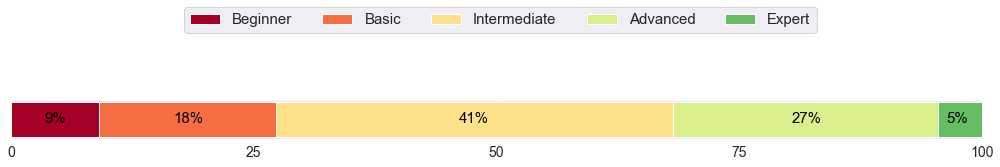

In [115]:
# Data
percentages = [(2/22)*100, (4/22)*100, (9/22)*100, (6/22)*100, (1/22)*100]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, scale_lists, loc='center', ncol=len(scale_lists), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/java_skill.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

## Q10: On a scale from 1 to 5, please rate your knowledge of the programming language JavaScript. (1: Beginner, 5: Expert)

In [116]:
# value counts for the "Skills" column
print(df['Skills6'].value_counts())

# Now, replace the values in the "Skills" column (1, 2, 3, 4, 5) with the corresponding scale (Beginner, Basic, Intermediate, Advanced, Expert)
scale_lists= ["Beginner", "Basic", "Intermediate", "Advanced", "Expert"]

# Replace the values in the "Skills" column
df['Skills6'] = df['Skills6'].replace({
    1: "Beginner",
    2: "Basic",
    3: "Intermediate",
    4: "Advanced",
    5: "Expert"
})
print("-------------------")

# Output the distribution of the values in "Skills" column after the replacement based on the order of the scale_lists
# Assuming df is your DataFrame and the 'Skills' column has already been modified
value_counts = df['Skills6'].value_counts()

# Reorder the value counts based on the scale_lists order
ordered_value_counts = value_counts.reindex(scale_lists)

# Print the reordered counts
print(ordered_value_counts)

3    6
1    6
4    5
2    4
5    1
Name: Skills6, dtype: int64
-------------------
Beginner        6
Basic           4
Intermediate    6
Advanced        5
Expert          1
Name: Skills6, dtype: int64


/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_88794/4072381526.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


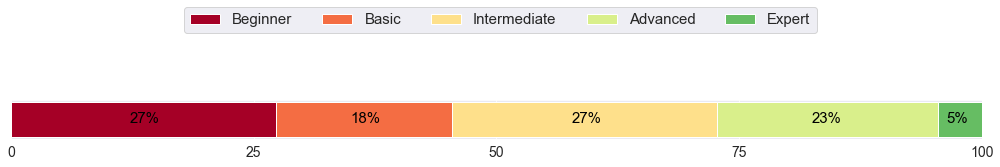

In [117]:
# Data
percentages = [(6/22)*100, (4/22)*100, (6/22)*100, (5/22)*100, (1/22)*100]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, scale_lists, loc='center', ncol=len(scale_lists), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/js_skill.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

## Q12: On a scale from 1 to 5, how would you rate your overall knowledge of cybersecurity? (1: Beginner, 5: Expert)

In [118]:
# value counts for the "Skills" column
print(df['Knowledge level'].value_counts())

# Now, replace the values in the "Skills" column (1, 2, 3, 4, 5) with the corresponding scale (Beginner, Basic, Intermediate, Advanced, Expert)
scale_lists= ["Beginner", "Basic", "Intermediate", "Advanced", "Expert"]

# Replace the values in the "Skills" column
df['Knowledge level'] = df['Knowledge level'].replace({
    1: "Beginner",
    2: "Basic",
    3: "Intermediate",
    4: "Advanced",
    5: "Expert"
})
print("-------------------")

# Output the distribution of the values in "Skills" column after the replacement based on the order of the scale_lists
# Assuming df is your DataFrame and the 'Skills' column has already been modified
value_counts = df['Knowledge level'].value_counts()

# Reorder the value counts based on the scale_lists order
ordered_value_counts = value_counts.reindex(scale_lists)

# Print the reordered counts
print(ordered_value_counts)

2    9
1    5
3    5
4    3
Name: Knowledge level, dtype: int64
-------------------
Beginner        5.0
Basic           9.0
Intermediate    5.0
Advanced        3.0
Expert          NaN
Name: Knowledge level, dtype: float64


/var/folders/_v/_8q_jx1d5yvb945rch5712vm0000gn/T/ipykernel_88794/1148628909.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend


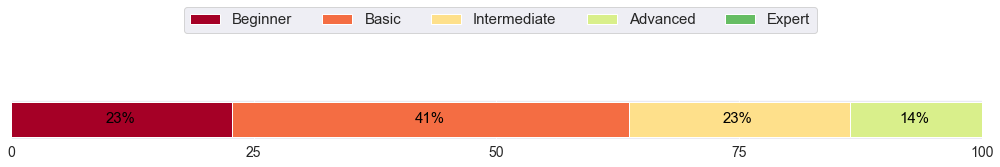

In [119]:
# Data
percentages = [(5/22)*100, (9/22)*100, (5/22)*100, (3/22)*100, 0]

# Round percentages to the nearest integer
# percentages = [round(p) for p in percentages]

# Calculate cumulative percentages
cum_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 2.2))

# Create stacked horizontal bar
for i in range(len(percentages)):
    if i == 0:
        ax.barh(0, percentages[i], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)
    else:
        ax.barh(0, percentages[i], left=cum_percentages[i-1], color=plt.cm.RdYlGn(i/len(percentages)), height=0.4)

# Add percentage labels only for non-zero values
for i, v in enumerate(percentages):
    if v != 0:
        v = round(v)
        ax.text(cum_percentages[i] - v/2, 0, str(int(v)) + "%", va='center', ha='center', color='black', fontsize=15)

# Set x-axis limits
ax.set_xlim(0, 100)

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Add x-axis ticks
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(["0", "25", "50", "75", "100"])  # Use an empty string for the first label
plt.xticks(fontsize=14)

# Add labels
# ax.set_title("(Q7) How helpful did you find the extension for identifying vulnerabilities in source code?", fontsize=13, pad=25)
ax.set_title(" ", fontsize=14, pad=50)

# Create a new axis for the legend
legend_ax = plt.axes([0.3, 0.9, 0.4, 0.1], frameon=False)

# Adjust the position of the legend axis
legend_ax.xaxis.set_visible(False)
legend_ax.yaxis.set_visible(False)

# Add legend horizontally at the top center
legend_ax.legend(ax.containers, scale_lists, loc='center', ncol=len(scale_lists), fontsize=15)

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space at the top for the legend

# Save the plot as pdf file with the name of "how_helpful_bar_stacked.png". with additional padding
plt.savefig('outputs/cybersecurity_skill.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

# Simulation!!!

In [120]:
# Desired distribution of the values in "How many years of experience do you have in cyber security?" column for each group.
distribution_cs_g1 = {'Less than 1 year': 9, '1-3 years': 1, '4-6 years': 1}
distribution_cs_g2 = {'Less than 1 year': 9, '1-3 years': 1, '10 years or more': 1}

# Run Simulation to get the best seed
for seed in range(1000000):
    # Categorize entries by experience level
    categorized_entries = defaultdict(list)
    for index, level in enumerate(df['How many years of experience do you have in software development?'].values):
        categorized_entries[level].append(index)

    # Initialize lists for the two groups' indexes
    group_1_indexes = []
    group_2_indexes = []

    # Evenly distribute indexes from each category to the groups
    for level, indexes in categorized_entries.items():
        # Some levels only have one entry, so we need to handle them separately
        if level=="Less than 1 year":
            random.Random(seed).shuffle(indexes)  # Shuffle to randomize distribution
            split_point = len(indexes) // 2
            group_1_indexes.extend(indexes[:split_point])
            group_2_indexes.extend(indexes[split_point:])
        if level=="7-9 years":
            group_1_indexes.extend(indexes)
        if level=="10 years or more":
            group_2_indexes.extend(indexes)
        if level=="1-3 years":
            random.Random(seed).shuffle(indexes)  # Shuffle to randomize distribution
            split_point = len(indexes) // 2
            # print("indexes[:split_point]:", indexes[:split_point])
            # print("indexes[split_point:]:", indexes[split_point:])
            group_1_indexes.extend(indexes[:split_point])
            group_2_indexes.extend(indexes[split_point:])
            
        if level=="4-6 years": # This has odd number of entries, thus, we should have +1 for group2
            random.Random(seed).shuffle(indexes)
            split_point = len(indexes) // 2
            group_1_indexes.extend(indexes[:split_point+1])
            group_2_indexes.extend(indexes[split_point+1:])

            
    if len(group_1_indexes) != len(group_2_indexes):
        print("Error: The two groups do not have the same number of entries.")
    # Check whether there is any duplicate index
    if len(set(group_1_indexes) & set(group_2_indexes)) > 0:
        print("Error: The two groups have duplicate entries.")
        
    # Check if the two groups have the same distribution of cyber security experience
    # Create the distribution of the values in the list of indexes in each group
    group_1 = df.loc[group_1_indexes]
    group_2 = df.loc[group_2_indexes]
    
    # Post-process
    # if the row number 13 is not in group 1, then we should continue the loop
    if 13 not in group_1.index:
        continue
    # if the row number 7 is not in group 2, then we should continue the loop
    if 7 not in group_2.index:
        continue
    # if the row number 4 is not in group 2, then we should continue the loop
    if 4 not in group_2.index:
        continue
    # if the row number 5 and 10 stored in the same group, then we should continue the loop
    if 5 in group_1.index and 10 in group_1.index:
        continue
    if 5 in group_2.index and 10 in group_2.index:
        continue
    
    if 14 not in group_2.index:
        continue
    
    # Finally, check the distribution of the cyber security experience
    group_1_cs_dict = group_1['How many years of experience do you have in cyber security?'].value_counts().to_dict()
    group_2_cs_dict = group_2['How many years of experience do you have in cyber security?'].value_counts().to_dict()

    if group_1_cs_dict == distribution_cs_g1:
        if group_2_cs_dict == distribution_cs_g2:
            print("Seed:", seed)
            print("Group 1:", group_1_cs_dict)
            print("Group 2:", group_2_cs_dict)
            break
    if group_1_cs_dict == distribution_cs_g2:
        if group_2_cs_dict == distribution_cs_g1:
            print("Seed:", seed)
            print("Group 1:", group_1_cs_dict)
            print("Group 2:", group_2_cs_dict)
            break
    

Seed: 49
Group 1: {'Less than 1 year': 9, '1-3 years': 1, '10 years or more': 1}
Group 2: {'Less than 1 year': 9, '4-6 years': 1, '1-3 years': 1}


# Further Analysis

In [121]:
# Read the excel file to the dataframe
df = pd.read_excel('pre_questionnaire.xlsx')

# Output the distribution of the values in "How many years of experience do you have in cyber security?" column.
print(df['What is your current job title?'].value_counts())

Software Engineer                                       3
Software engineer                                       2
Freelancing IT Consultant                               1
Research Associate in Geoinformatics                    1
Manager Technology                                      1
Research Associate                                      1
Senior Key Expert                                       1
Working Student, Platforms - Artificial Intelligence    1
Software Developer                                      1
Doctoral candidate                                      1
Cyber Security Consultant                               1
IT Consultant                                           1
Data and business analysis                              1
Software Engineer                                       1
システムエンジニア                                               1
Security Consultant                                     1
Perception Development Engineer                         1
Working Studen

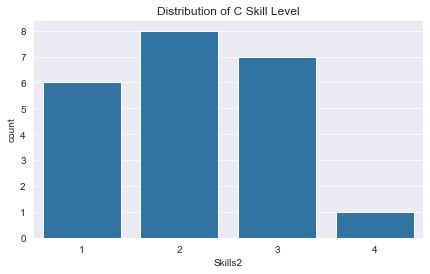

In [122]:
# I would like to visualize the historgram of the "Skill6" column
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(
    x='Skills2', 
    data=df,
    color=sns.color_palette("tab10")[0])

plt.title('Distribution of C Skill Level')
plt.show()

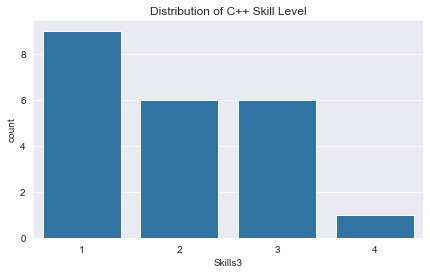

In [123]:
# I would like to visualize the historgram of the "Skill6" column
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(
    x='Skills3', 
    data=df,
    color=sns.color_palette("tab10")[0])

plt.title('Distribution of C++ Skill Level')
plt.show()

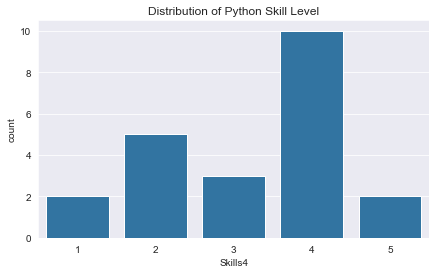

In [124]:
# I would like to visualize the historgram of the "Skill6" column
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(
    x='Skills4', 
    data=df,
    color=sns.color_palette("tab10")[0])

plt.title('Distribution of Python Skill Level')
plt.show()

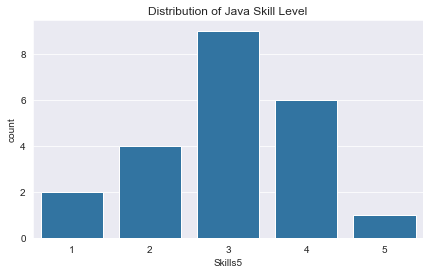

In [125]:
# I would like to visualize the historgram of the "Skill6" column
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(
    x='Skills5', 
    data=df,
    color=sns.color_palette("tab10")[0])

plt.title('Distribution of Java Skill Level')
plt.show()

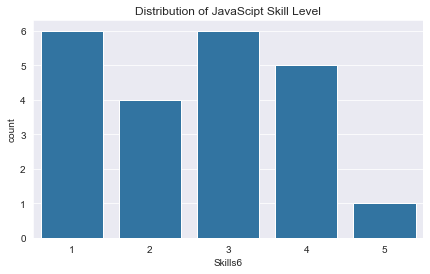

In [126]:
# I would like to visualize the historgram of the "Skill6" column
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(
    x='Skills6', 
    data=df,
    color=sns.color_palette("tab10")[0])

plt.title('Distribution of JavaScipt Skill Level')
plt.show()